### import libraries

In [1]:
import requests
from bs4 import BeautifulSoup

###  Search for Relevant Websites 

In [2]:
# Step 1: Send a GET request to the website
url = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'  # Replace with your target URL
response = requests.get(url)

In [3]:
print(response.text)

<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><li

In [4]:
import requests
from bs4 import BeautifulSoup

# Step 1: Send GET request
url = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Step 2: Parse HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Extract brand names
# On Flipkart, product titles are often inside <div> tags with specific classes
brands = []

for item in soup.find_all("div", class_="KzDlHZ"):  # class for product name in grid view
    brand_name = item.text.split()[0]  # first word is usually brand (e.g., HP, Dell)
    brands.append(brand_name)

# Step 4: Display results
print("Extracted Brand Names:")
for b in set(brands):
    print(b)


Extracted Brand Names:
Jio
Lenovo
ASUS
DELL
Acer
Samsung
MOTOROLA
HP


In [5]:
import requests
from bs4 import BeautifulSoup
import time

brands = []

# Loop through 24 pages
for page in range(1, 25):
    print(f"Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }
    
    # Send GET request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract product names
    for item in soup.find_all("div", class_="KzDlHZ"):
        brand_name = " ".join(item.text.split()[0:12])  # usually first word is the brand
        brands.append(brand_name)  # ✅ FIXED: removed invalid text here

    # Wait 1 second between requests
    time.sleep(1)

# Remove duplicates
unique_brands = sorted(set(brands))

# Display results
print("\n✅ Extracted Brand Names from 24 pages:")
for b in unique_brands:
    print(b)

print(f"\nTotal unique brands found: {len(unique_brands)}")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...

✅ Extracted Brand Names from 24 pages:
ASUS Chromebook CX15 Intel Celeron Dual Core N4500 - (4 GB/64 GB
ASUS Chromebook Intel Celeron Dual Core N4500 - (4 GB/64 GB EMMC
ASUS Expertbook Intel Core i7 13th Gen 13620H - (32 GB/512 GB
ASUS Expertbook P1 High-performance processor Intel Core i5 13th Gen 13420H -
ASUS Expertbook P1 High-performance processor Intel Core i7 13th Gen 13620H -
ASUS Expertbook P1 Intel Core i3 13th Gen 1315U - (16 GB/512
ASUS Expertbook P1 Intel Core i3 13th Gen 1315U - (8 GB/512
ASUS Gaming V16 (202

In [8]:
brands

['HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB SSD/Windows',
 'MOTOROLA Motobook 60 Full Metal OLED (i5 14th Gen) Intel Core 5',
 'Samsung Galaxy Book4 Edge Series Copilot AI-PC Full Metal Chasis Qualcomm Snapdragon',
 'Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (16 GB/512',
 'Jio - JioBook 11 (JioOS) with Lifetime Office, MediaTek MT8788 - (4',
 'HP MSO 2024 Intel Core i3 13th Gen 1315U - (16 GB/512',
 'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/128 GB SSD/Windows',
 'ASUS Expertbook P1 Intel Core i3 13th Gen 1315U - (16 GB/512',
 'Acer Aspire 14 with Backlit Keyboard, Intel Core i5 13th Gen 13500H',
 'Lenovo Chromebook MediaTek Kompanio 520 - (4 GB/128 GB EMMC Storage/Chrome OS)',
 'Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 12450H - (16',
 'HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Windows 11',
 'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/512 GB SSD/Windows',
 'DELL 15 AMD Ryzen 3 Quad Core 7320U - (8 GB/512 GB',
 'DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/512 GB',
 '

In [6]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []

# Known Flipkart class patterns (Flipkart rotates these frequently)
NAME_CLASSES = ["KzDlHZ", "s1Q9rs", "wgXkEe"]
PRICE_CLASSES = ["Nx9bqj", "_4b5DiR", "_30jeq3"]

def find_with_multiple_classes(soup, class_list):
    """Try multiple class names and return the first non-empty result."""
    for cls in class_list:
        result = soup.find_all("div", class_=cls)
        if result:
            return result
    return []

for page in range(1, 25):
    print(f"Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
                       (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Flexible search
    names = find_with_multiple_classes(soup, NAME_CLASSES)
    prices = find_with_multiple_classes(soup, PRICE_CLASSES)

    if not names or not prices:
        print(f"⚠ Warning: Page {page} returned no valid data (class changed?)")
        continue

    for name, price in zip(names, prices):
        full_name = name.text.strip()
        brand = full_name.split()[0]
        price_value = price.text.strip()

        products.append({
            "Brand": brand,
            "Product Name": full_name,
            "Price": price_value
        })

    time.sleep(1)

df = pd.DataFrame(products)

print("\n✅ Scraping Completed!")
print(f"Total products scraped: {len(df)}")
print(df.head())


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...

✅ Scraping Completed!
Total products scraped: 576
     Brand                                       Product Name    Price
0     DELL  DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...  ₹36,990
1       HP  HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...  ₹33,490
2  Samsung  Samsung Galaxy Book4 Edge Series Copilot AI-PC...  ₹64,990
3     Acer  Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (...  ₹33,990
4      Jio  Jio - JioBook 11 (JioOS) with Lifetime Office,...  ₹12,990


In [7]:
df

,Brand,Product Name,Price
0,DELL,DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...,"₹36,990"
1,HP,HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...,"₹33,490"
2,Samsung,Samsung Galaxy Book4 Edge Series Copilot AI-PC...,"₹64,990"
3,Acer,Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (...,"₹33,990"
4,Jio,"Jio - JioBook 11 (JioOS) with Lifetime Office,...","₹12,990"
...,...,...,...
571,Lenovo,Lenovo IdeaPad Slim 3 Next Gen AI PC WUXGA IPS...,"₹49,990"
572,Acer,Acer Predator Helios Neo 16S AI Intel Core Ult...,"₹1,59,999"
573,Lenovo,Lenovo IdeaPad 3 Intel Core i3 12th Gen 1215U ...,"₹32,990"
574,Lenovo,Lenovo IdeaPad Slim 3 Intel Core i3 13th Gen 1...,"₹35,778"


In [21]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []  # To store all laptop details

# Loop through 24 pages
for page in range(1, 25):
    print(f"🔍 Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product names, prices, and ratings
    names = soup.find_all("div", class_="KzDlHZ")
    prices = soup.find_all("div", class_="Nx9bqj _4b5DiR")  # New class for prices
    ratings = soup.find_all("div", class_="XQDdHH")  # Ratings container

    # Handle older HTML structure if needed
    if not prices:
        prices = soup.find_all("div", class_="_30jeq3")
    if not ratings:
        ratings = soup.find_all("div", class_="_3LWZlK")

    # Zip ensures alignment between lists
    for name, price, rating in zip(names, prices, ratings):
        full_name = name.text.strip()
        brand_name = full_name.split()[0]
        price_value = price.text.strip()
        rating_value = rating.text.strip()

        products.append({
            "Brand": brand_name,
            "Product Name": full_name,
            "Price": price_value,
            "Rating": rating_value
        })

    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(products)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Save to CSV
df.to_csv("flipkart_laptops_with_ratings.csv", index=False, encoding='utf-8')

# Show summary
print("\n✅ Data extracted successfully and saved to 'flipkart_laptops_with_ratings.csv'")
print(f"Total products scraped: {len(df)}")
print("\nSample data:")
print(df.head(10))

🔍 Scraping page 1...
🔍 Scraping page 2...
🔍 Scraping page 3...
🔍 Scraping page 4...
🔍 Scraping page 5...
🔍 Scraping page 6...
🔍 Scraping page 7...
🔍 Scraping page 8...
🔍 Scraping page 9...
🔍 Scraping page 10...
🔍 Scraping page 11...
🔍 Scraping page 12...
🔍 Scraping page 13...
🔍 Scraping page 14...
🔍 Scraping page 15...
🔍 Scraping page 16...
🔍 Scraping page 17...
🔍 Scraping page 18...
🔍 Scraping page 19...
🔍 Scraping page 20...
🔍 Scraping page 21...
🔍 Scraping page 22...
🔍 Scraping page 23...
🔍 Scraping page 24...

✅ Data extracted successfully and saved to 'flipkart_laptops_with_ratings.csv'
Total products scraped: 397

Sample data:
     Brand                                       Product Name    Price Rating
0       HP  HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...  ₹34,490    4.1
1       HP  HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...  ₹39,990    4.1
2     Acer  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...  ₹27,990    4.2
3     Acer  Acer Aspire 3 Intel Celeron Dual Co

In [23]:
df

,Brand,Product Name,Price,Rating
0,HP,HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...,"₹34,490",4.1
1,HP,HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...,"₹39,990",4.1
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,"₹14,999",4.2
...,...,...,...,...
571,Lenovo,Lenovo LOQ Essential Intel Core i5 12th Gen 12...,"₹59,490",3.3
572,Acer,Acer Aspire Lite Intel Core i7 12th Gen 12650H...,"₹57,890",4.4
573,ASUS,ASUS ROG Ally AMD Ryzen Z1 Octa Core Extreme -...,"₹40,099",4.4
574,ASUS,ASUS Vivobook S14 OLED Intel EVO H-Series Back...,"₹70,990",4.5


In [25]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []

# Loop through 24 pages
for page in range(1, 25):
    print(f"🔍 Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product info
    names = soup.find_all("div", class_="KzDlHZ")
    prices = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    ratings = soup.find_all("div", class_="XQDdHH")
    specs_blocks = soup.find_all("ul", class_="G4BRas")  # specifications block

    # Fallbacks for older layout
    if not prices:
        prices = soup.find_all("div", class_="_30jeq3")
    if not ratings:
        ratings = soup.find_all("div", class_="_3LWZlK")

    for name, price, rating, specs in zip(names, prices, ratings, specs_blocks):
        full_name = name.text.strip()
        brand_name = full_name.split()[0]
        price_value = price.text.strip()
        rating_value = rating.text.strip()

        # Extract processor info
        processor = "N/A"
        for li in specs.find_all("li"):
            text = li.text.strip()
            if "Processor" in text or "Ryzen" in text or "Core" in text:
                processor = text
                break

        products.append({
            "Brand": brand_name,
            "Product Name": full_name,
            "Processor": processor,
            "Price": price_value,
            "Rating": rating_value
        })

    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(products)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Save to CSV
df.to_csv("flipkart_laptops_full.csv", index=False, encoding='utf-8')

# Summary
print("\n✅ Data extracted successfully and saved to 'flipkart_laptops_full.csv'")
print(f"Total products scraped: {len(df)}")
print("\nSample data:")
print(df.head(10))

🔍 Scraping page 1...
🔍 Scraping page 2...
🔍 Scraping page 3...
🔍 Scraping page 4...
🔍 Scraping page 5...
🔍 Scraping page 6...
🔍 Scraping page 7...
🔍 Scraping page 8...
🔍 Scraping page 9...
🔍 Scraping page 10...
🔍 Scraping page 11...
🔍 Scraping page 12...
🔍 Scraping page 13...
🔍 Scraping page 14...
🔍 Scraping page 15...
🔍 Scraping page 16...
🔍 Scraping page 17...
🔍 Scraping page 18...
🔍 Scraping page 19...
🔍 Scraping page 20...
🔍 Scraping page 21...
🔍 Scraping page 22...
🔍 Scraping page 23...
🔍 Scraping page 24...

✅ Data extracted successfully and saved to 'flipkart_laptops_full.csv'
Total products scraped: 417

Sample data:
     Brand                                       Product Name  \
0       HP  HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...   
1       HP  HP Victus Intel Core i5 13th Gen 13420H - (16 ...   
2     Acer  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
3     Acer  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   
4     ASUS  ASUS Chromebook CX1 Intel Cele

In [27]:
df

,Brand,Product Name,Processor,Price,Rating
0,HP,HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...,AMD Ryzen 5 Quad Core Processor,"₹34,490",4.1
1,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),"₹66,990",4.2
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,"₹14,999",4.2
...,...,...,...,...,...
571,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),"₹71,290",4
572,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,"₹37,990",4.4
573,Lenovo,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),"₹45,990",4.2
574,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,"₹76,990",4.5


In [29]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []

# Loop through 24 pages
for page in range(1, 25):
    print(f"🔍 Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product information
    names = soup.find_all("div", class_="KzDlHZ")
    prices = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    ratings = soup.find_all("div", class_="XQDdHH")
    specs_blocks = soup.find_all("ul", class_="G4BRas")  # Specs list (Processor, RAM, etc.)

    # Fallbacks for older Flipkart layouts
    if not prices:
        prices = soup.find_all("div", class_="_30jeq3")
    if not ratings:
        ratings = soup.find_all("div", class_="_3LWZlK")

    for name, price, rating, specs in zip(names, prices, ratings, specs_blocks):
        full_name = name.text.strip()
        brand_name = full_name.split()[0]
        price_value = price.text.strip()
        rating_value = rating.text.strip()

        # Default values
        processor = "N/A"
        ram = "N/A"

        # Extract processor and RAM from the specs list
        for li in specs.find_all("li"):
            text = li.text.strip()
            if any(word in text for word in ["Processor", "Ryzen", "Core", "Celeron"]):
                processor = text
            if "RAM" in text:
                ram = text

        products.append({
            "Brand": brand_name,
            "Product Name": full_name,
            "Processor": processor,
            "RAM": ram,
            "Price": price_value,
            "Rating": rating_value
        })

    # Pause 1 second between pages to avoid getting blocked
    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(products)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Save to CSV
df.to_csv("flipkart_laptops_detailed.csv", index=False, encoding='utf-8')

# Display summary
print("\n✅ Data extracted successfully and saved to 'flipkart_laptops_detailed.csv'")
print(f"Total products scraped: {len(df)}")
print("\nSample data:")
print(df.head(10))


🔍 Scraping page 1...
🔍 Scraping page 2...
🔍 Scraping page 3...
🔍 Scraping page 4...
🔍 Scraping page 5...
🔍 Scraping page 6...
🔍 Scraping page 7...
🔍 Scraping page 8...
🔍 Scraping page 9...
🔍 Scraping page 10...
🔍 Scraping page 11...
🔍 Scraping page 12...
🔍 Scraping page 13...
🔍 Scraping page 14...
🔍 Scraping page 15...
🔍 Scraping page 16...
🔍 Scraping page 17...
🔍 Scraping page 18...
🔍 Scraping page 19...
🔍 Scraping page 20...
🔍 Scraping page 21...
🔍 Scraping page 22...
🔍 Scraping page 23...
🔍 Scraping page 24...

✅ Data extracted successfully and saved to 'flipkart_laptops_detailed.csv'
Total products scraped: 414

Sample data:
     Brand                                       Product Name  \
0       HP  HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...   
1       HP  HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...   
2     Acer  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
3     Acer  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   
4     ASUS  ASUS Chromebook CX1 Intel 

In [31]:
df

,Brand,Product Name,Processor,RAM,Price,Rating
0,HP,HP AMD Ryzen 5 Quad Core 7520U - (8 GB/512 GB ...,AMD Ryzen 5 Quad Core Processor,8 GB LPDDR5 RAM,"₹34,490",4.1
1,HP,HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...,Intel Core i3 Processor (13th Gen),16 GB DDR4 RAM,"₹39,990",4.1
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,"₹14,999",4.2
...,...,...,...,...,...,...
571,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,"₹71,290",4
572,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,"₹37,990",4.4
573,Lenovo,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,"₹45,990",4.2
574,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,"₹76,990",4.5


In [33]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []

# Loop through 24 pages
for page in range(1, 25):
    print(f"🔍 Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product information
    names = soup.find_all("div", class_="KzDlHZ")
    prices = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    ratings = soup.find_all("div", class_="XQDdHH")
    specs_blocks = soup.find_all("ul", class_="G4BRas")  # Specification block

    # Fallbacks for older Flipkart layout
    if not prices:
        prices = soup.find_all("div", class_="_30jeq3")
    if not ratings:
        ratings = soup.find_all("div", class_="_3LWZlK")

    # Loop through each product block
    for name, price, rating, specs in zip(names, prices, ratings, specs_blocks):
        full_name = name.text.strip()
        brand_name = full_name.split()[0]
        price_value = price.text.strip()
        rating_value = rating.text.strip()

        # Default values
        processor = "N/A"
        ram = "N/A"
        os = "N/A"

        # Extract processor, RAM, and OS details
        for li in specs.find_all("li"):
            text = li.text.strip()
            if any(word in text for word in ["Processor", "Ryzen", "Core", "Celeron"]):
                processor = text
            if "RAM" in text:
                ram = text
            if "Windows" in text or "DOS" in text or "Operating System" in text or "macOS" in text:
                os = text

        products.append({
            "Brand": brand_name,
            "Product Name": full_name,
            "Processor": processor,
            "RAM": ram,
            "Operating System": os,
            "Price": price_value,
            "Rating": rating_value
        })

    time.sleep(1)  # Pause to avoid being blocked

# Convert to DataFrame
df = pd.DataFrame(products)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save to CSV
df.to_csv("flipkart_laptops_fullspecs.csv", index=False, encoding='utf-8')

# Display summary
print("\n✅ Data extracted successfully and saved to 'flipkart_laptops_fullspecs.csv'")
print(f"Total products scraped: {len(df)}")
print("\nSample data:")
print(df.head(10))


🔍 Scraping page 1...
🔍 Scraping page 2...
🔍 Scraping page 3...
🔍 Scraping page 4...
🔍 Scraping page 5...
🔍 Scraping page 6...
🔍 Scraping page 7...
🔍 Scraping page 8...
🔍 Scraping page 9...
🔍 Scraping page 10...
🔍 Scraping page 11...
🔍 Scraping page 12...
🔍 Scraping page 13...
🔍 Scraping page 14...
🔍 Scraping page 15...
🔍 Scraping page 16...
🔍 Scraping page 17...
🔍 Scraping page 18...
🔍 Scraping page 19...
🔍 Scraping page 20...
🔍 Scraping page 21...
🔍 Scraping page 22...
🔍 Scraping page 23...
🔍 Scraping page 24...

✅ Data extracted successfully and saved to 'flipkart_laptops_fullspecs.csv'
Total products scraped: 438

Sample data:
     Brand                                       Product Name  \
0     Acer  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
1     ASUS  ASUS Chromebook CX1 Intel Celeron Dual Core N4...   
2     Acer  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   
3  Samsung  Samsung Galaxy Book4 Edge Series Copilot AI-PC...   
4     Acer  Acer Aspire 3 Intel Core 

In [35]:
df

,Brand,Product Name,Processor,RAM,Operating System,Price,Rating
0,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,"₹27,990",4.2
1,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,"₹14,999",4.2
2,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,"₹19,990",3.8
3,Samsung,Samsung Galaxy Book4 Edge Series Copilot AI-PC...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,64 bit Windows 11 Operating System,"₹64,990",4.4
4,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,"₹28,990",4.2
...,...,...,...,...,...,...,...
569,DELL,DELL Latitude 3440 (2024) Intel Core i3 12th G...,Intel Core i3 Processor (12th Gen),32 GB DDR4 RAM,64 bit Windows 11 Operating System,"₹39,990",4.5
572,Samsung,Samsung Galaxy Book4 Pro Evo AI PC Intel Core ...,Intel Core Ultra 5 Processor,16 GB LPDDR5X RAM,64 bit Windows 11 Operating System,"₹1,19,032",4.4
573,Lenovo,Lenovo V 14 (2025) Intel Core i5 13th Gen 1342...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home","₹49,990",3.7
574,HP,HP 255 G10 (2025) AMD Athlon Dual Core 7120U -...,AMD Athlon Dual Core Processor,8 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home","₹24,490",2.5


In [37]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

products = []

# Loop through 24 pages
for page in range(1, 25):
    print(f"🔍 Scraping page {page}...")

    url = f'https://www.flipkart.com/search?q=laptops&page={page}'
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract product elements
    names = soup.find_all("div", class_="KzDlHZ")
    prices = soup.find_all("div", class_="Nx9bqj _4b5DiR")
    ratings = soup.find_all("div", class_="XQDdHH")
    specs_blocks = soup.find_all("ul", class_="G4BRas")  # specification list (processor, RAM, etc.)

    # Fallbacks for older layout
    if not prices:
        prices = soup.find_all("div", class_="_30jeq3")
    if not ratings:
        ratings = soup.find_all("div", class_="_3LWZlK")

    for name, price, rating, specs in zip(names, prices, ratings, specs_blocks):
        full_name = name.text.strip()
        brand_name = full_name.split()[0]
        price_value = price.text.strip()
        rating_value = rating.text.strip()

        # Default placeholders
        processor = "N/A"
        ram = "N/A"
        os = "N/A"
        storage = "N/A"

        # Extract processor, RAM, OS, storage info from specs list
        for li in specs.find_all("li"):
            text = li.text.strip()

            if any(word in text for word in ["Processor", "Ryzen", "Core", "Celeron"]):
                processor = text
            elif "RAM" in text:
                ram = text
            elif any(word in text for word in ["Windows", "DOS", "Operating System", "macOS"]):
                os = text
            elif any(word in text for word in ["SSD", "HDD", "Storage"]):
                storage = text

        products.append({
            "Brand": brand_name,
            "Product Name": full_name,
            "Processor": processor,
            "RAM": ram,
            "Operating System": os,
            "Storage": storage,
            "Price": price_value,
            "Rating": rating_value
        })

    time.sleep(1)  # prevent being blocked

# Convert list to DataFrame
df = pd.DataFrame(products)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save as CSV
df.to_csv("flipkart_laptops_complete.csv", index=False, encoding='utf-8')

# Show summary
print("\n✅ Data extracted successfully and saved to 'flipkart_laptops_complete.csv'")
print(f"Total products scraped: {len(df)}")
print("\nSample data:")
print(df.head(10))

🔍 Scraping page 1...
🔍 Scraping page 2...
🔍 Scraping page 3...
🔍 Scraping page 4...
🔍 Scraping page 5...
🔍 Scraping page 6...
🔍 Scraping page 7...
🔍 Scraping page 8...
🔍 Scraping page 9...
🔍 Scraping page 10...
🔍 Scraping page 11...
🔍 Scraping page 12...
🔍 Scraping page 13...
🔍 Scraping page 14...
🔍 Scraping page 15...
🔍 Scraping page 16...
🔍 Scraping page 17...
🔍 Scraping page 18...
🔍 Scraping page 19...
🔍 Scraping page 20...
🔍 Scraping page 21...
🔍 Scraping page 22...
🔍 Scraping page 23...
🔍 Scraping page 24...

✅ Data extracted successfully and saved to 'flipkart_laptops_complete.csv'
Total products scraped: 421

Sample data:
     Brand                                       Product Name  \
0       HP  HP Victus Intel Core i5 13th Gen 13420H - (16 ...   
1       HP  HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...   
2     Acer  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
3     Acer  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   
4     ASUS  ASUS Chromebook CX1 Intel 

In [48]:
df

,Brand,Product Name,Processor,RAM,Operating System,Storage,Price,Rating
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 and Microsoft Office Home & Student...,512 GB SSD,"₹66,990",4.2
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,8 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,"₹36,990",4.2
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,N/A,"₹14,999",4.2
...,...,...,...,...,...,...,...,...
571,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹71,290",4
572,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,"₹37,990",4.4
573,Lenovo,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home",512 GB SSD,"₹45,990",4.2
574,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,Windows 11 Home Operating System,512 GB SSD,"₹76,990",4.5


### Create a DataFrame

In [50]:
df

,Brand,Product Name,Processor,RAM,Operating System,Storage,Price,Rating
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 and Microsoft Office Home & Student...,512 GB SSD,"₹66,990",4.2
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,8 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,"₹36,990",4.2
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,N/A,"₹14,999",4.2
...,...,...,...,...,...,...,...,...
571,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹71,290",4
572,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,"₹37,990",4.4
573,Lenovo,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home",512 GB SSD,"₹45,990",4.2
574,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,Windows 11 Home Operating System,512 GB SSD,"₹76,990",4.5


In [52]:
df.head(10)

,Brand,Product Name,Processor,RAM,Operating System,Storage,Price,Rating
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 and Microsoft Office Home & Student...,512 GB SSD,"₹66,990",4.2
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,8 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,"₹36,990",4.2
2,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹27,990",4.2
3,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,"₹19,990",3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,N/A,"₹14,999",4.2
5,HP,HP 15 Intel Core 5 120U - (16 GB/512 GB SSD/Wi...,Intel Core 5 Processor,16 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,"₹54,990",3.6
6,Acer,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,"₹28,990",4.2
7,Samsung,Samsung Galaxy Book4 Edge Series Copilot AI-PC...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,64 bit Windows 11 Operating System,512 GB SSD,"₹64,990",4.4
8,Acer,Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (...,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,"₹35,990",4.1
9,Acer,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,128 GB SSD,"₹15,681",3.8


### Data Cleaning

In [59]:
df.dtypes

Brand                object
Product Name         object
Processor            object
RAM                  object
Operating System     object
Storage              object
Price                 int64
Rating              float64
RAM(GB)             float64
Storage(GB)         float64
dtype: object

In [61]:
import pandas as pd
import numpy as np

# ✅ Remove duplicates
df.drop_duplicates(inplace=True)

# ✅ Reset index
df.reset_index(drop=True, inplace=True)

# ✅ Clean 'Price' column
# Remove currency symbols and commas, convert to integer
# Convert to string first
df['Price'] = df['Price'].astype(str)

df['Price'] = df['Price'].str.replace('₹', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# ✅ Clean 'Rating' column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # convert to float

# ✅ Standardize 'Brand' column
df['Brand'] = df['Brand'].str.upper().str.strip()

# ✅ Clean 'RAM' column (convert to GB)
def clean_ram(value):
    if pd.isna(value):
        return np.nan
    value = value.lower().replace('gb', '').replace('mb', '')
    try:
        return int(value)
    except:
        return np.nan

df['RAM(GB)'] = df['RAM'].apply(clean_ram)

# ✅ Clean 'Storage' column
def clean_storage(value):
    if pd.isna(value):
        return np.nan
    value = value.lower().replace('gb', '').replace('tb', '000')  # convert TB to GB approx
    value = ''.join(filter(str.isdigit, value))
    try:
        return int(value)
    except:
        return np.nan

df['Storage(GB)'] = df['Storage'].apply(clean_storage)

# ✅ Fill missing values
df['Processor'].fillna('Unknown', inplace=True)
df['Operating System'].fillna('No', inplace=True)

# ✅ Remove unnecessary columns if needed
# df.drop(['RAM', 'Storage'], axis=1, inplace=True)

# ✅ Check final cleaned data
print(df.head(10))

     Brand                                       Product Name  \
0       HP  HP Victus Intel Core i5 13th Gen 13420H - (16 ...   
1       HP  HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...   
2     ACER  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
3     ACER  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   
4     ASUS  ASUS Chromebook CX1 Intel Celeron Dual Core N4...   
5       HP  HP 15 Intel Core 5 120U - (16 GB/512 GB SSD/Wi...   
6     ACER  Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...   
7  SAMSUNG  Samsung Galaxy Book4 Edge Series Copilot AI-PC...   
8     ACER  Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (...   
9     ACER  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...   

                            Processor                RAM  \
0  Intel Core i5 Processor (13th Gen)     16 GB DDR4 RAM   
1              Intel Core 3 Processor      8 GB DDR4 RAM   
2  Intel Core i3 Processor (12th Gen)      8 GB DDR4 RAM   
3   Intel Celeron Dual Core Processor      8

C:\Users\mouni\AppData\Local\Temp\ipykernel_25644\1520817651.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processor'].fillna('Unknown', inplace=True)
C:\Users\mouni\AppData\Local\Temp\ipykernel_25644\1520817651.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [63]:
print("\nSummary:")
df.describe()
df.info()
df.isnull().sum()


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             421 non-null    object 
 1   Product Name      421 non-null    object 
 2   Processor         421 non-null    object 
 3   RAM               421 non-null    object 
 4   Operating System  421 non-null    object 
 5   Storage           421 non-null    object 
 6   Price             421 non-null    int64  
 7   Rating            421 non-null    float64
 8   RAM(GB)           0 non-null      float64
 9   Storage(GB)       404 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 33.0+ KB


Brand                 0
Product Name          0
Processor             0
RAM                   0
Operating System      0
Storage               0
Price                 0
Rating                0
RAM(GB)             421
Storage(GB)          17
dtype: int64

In [65]:
df

,Brand,Product Name,Processor,RAM,Operating System,Storage,Price,Rating,RAM(GB),Storage(GB)
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 and Microsoft Office Home & Student...,512 GB SSD,66990,4.2,NaN,512.0
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,8 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,36990,4.2,NaN,512.0
2,ACER,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,27990,4.2,NaN,512.0
3,ACER,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,19990,3.8,NaN,512.0
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,N/A,14999,4.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
416,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,71290,4.0,NaN,512.0
417,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,37990,4.4,NaN,512.0
418,LENOVO,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home",512 GB SSD,45990,4.2,NaN,512.0
419,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,Windows 11 Home Operating System,512 GB SSD,76990,4.5,NaN,512.0


In [73]:
df_drop = df.drop(columns=['RAM','Storage'])

In [75]:
df_drop

,Brand,Product Name,Processor,Operating System,Price,Rating
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),Windows 11 and Microsoft Office Home & Student...,66990,4.2
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,Windows 11 Home Operating System,36990,4.2
2,ACER,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),64 bit Windows 11 Operating System,27990,4.2
3,ACER,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,64 bit Windows 11 Home Operating System,19990,3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,Chrome Operating System,14999,4.2
...,...,...,...,...,...,...
416,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),64 bit Windows 11 Operating System,71290,4.0
417,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,Windows 11 Operating System,37990,4.4
418,LENOVO,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),"Microsoft Office 2021, Windows 11 Home",45990,4.2
419,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,Windows 11 Home Operating System,76990,4.5


### Export Data to csv

In [77]:
df.to_csv('Cleaned_Laptop_Data.csv', index=False)

In [79]:
df

,Brand,Product Name,Processor,RAM,Operating System,Storage,Price,Rating
0,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 and Microsoft Office Home & Student...,512 GB SSD,66990,4.2
1,HP,HP 15 Intel Core 3 100U - (8 GB/512 GB SSD/Win...,Intel Core 3 Processor,8 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,36990,4.2
2,ACER,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,27990,4.2
3,ACER,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,19990,3.8
4,ASUS,ASUS Chromebook CX1 Intel Celeron Dual Core N4...,Intel Celeron Dual Core Processor,8 GB LPDDR4X RAM,Chrome Operating System,N/A,14999,4.2
...,...,...,...,...,...,...,...,...
416,HP,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,71290,4.0
417,MSI,MSI AMD Ryzen 5 Hexa Core 7530U - (8 GB/512 GB...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,37990,4.4
418,LENOVO,Lenovo V 14 (2025) Intel Core i5 12th Gen 1235...,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,"Microsoft Office 2021, Windows 11 Home",512 GB SSD,45990,4.2
419,ASUS,ASUS Vivobook S16 OLED (2025) with Backlit Key...,Qualcomm Snapdragon X Processor,16 GB LPDDR5X RAM,Windows 11 Home Operating System,512 GB SSD,76990,4.5


In [81]:
# Save cleaned DataFrame to Excel
output_file = "cleaned_laptop_data.xlsx"

# Make sure to install openpyxl if not already: pip install openpyxl
df.to_excel(output_file, index=False)

print(f"Data saved successfully to {output_file}")

Data saved successfully to cleaned_laptop_data.xlsx


In [91]:
import pandas as pd
#pip install xlrd

df = pd.read_excel(r"C:\Users\mouni\Downloads\Web Scraping\cleaned_laptop_data.xlsx")

### missing values check

In [93]:
# Step 7: Check missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Brand                0
Product Name         0
Processor            0
RAM                  0
Operating System     0
Storage             17
Price                0
Rating               0
dtype: int64


### Read Cleaned CSV for EDA

In [95]:
# Step 10: Read Cleaned Data
df = pd.read_csv("Cleaned_Laptop_Data.csv")

# Display data summary
print("Number of Features (Columns):", df.shape[1])
print("Number of Observations (Rows):", df.shape[0])
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Number of Features (Columns): 8
Number of Observations (Rows): 421

Data Types:
 Brand                object
Product Name         object
Processor            object
RAM                  object
Operating System     object
Storage              object
Price                 int64
Rating              float64
dtype: object

Missing Values:
 Brand                0
Product Name         0
Processor            0
RAM                  0
Operating System     0
Storage             17
Price                0
Rating               0
dtype: int64


### Exploratory Data Analysis (EDA)

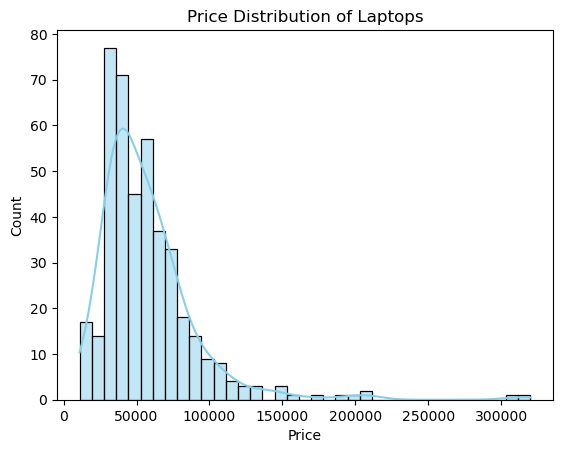

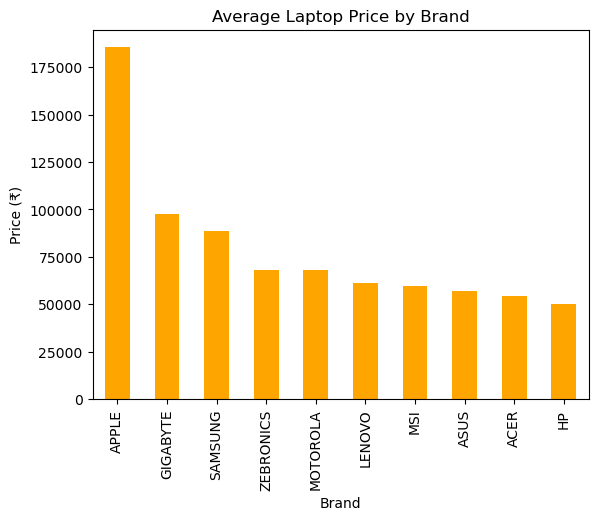

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Price
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title("Price Distribution of Laptops")
plt.show()

# Top 10 Brands by Average Price
top_brands = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', color='orange')
plt.title("Average Laptop Price by Brand")
plt.ylabel("Price (₹)")
plt.show()


### Univariate Analysis (Single column insights)

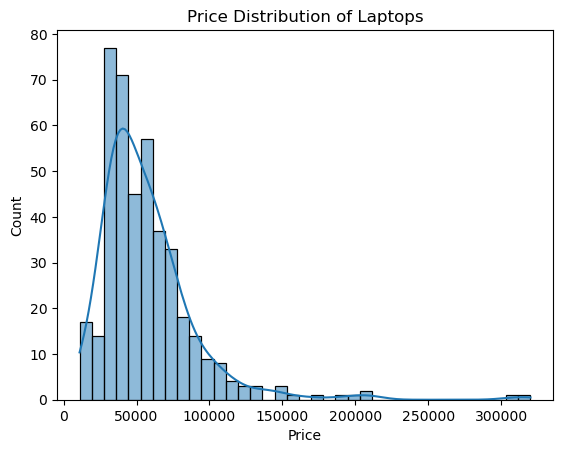

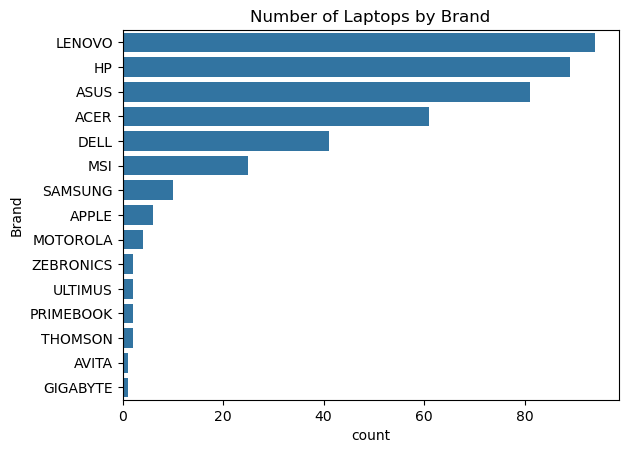

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution of Laptops")
plt.show()

# Brand count
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title("Number of Laptops by Brand")
plt.show()

### Bivariate Analysis (Compare two columns)

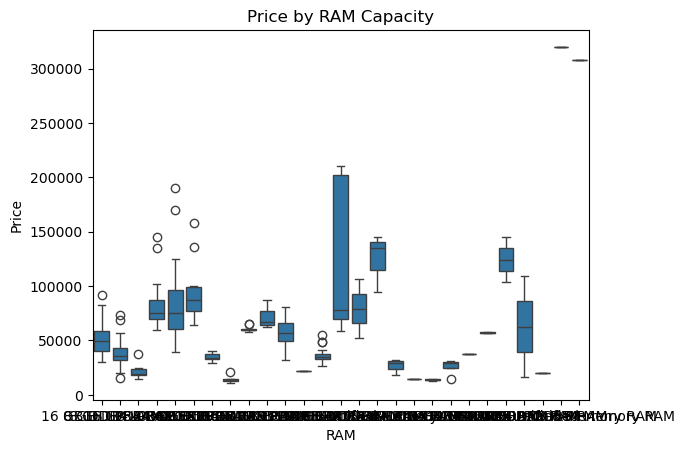

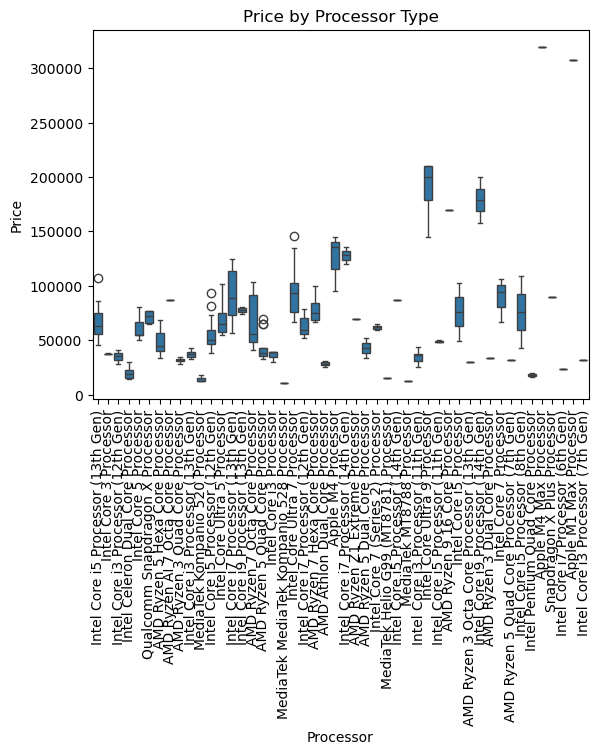

In [101]:
# Price vs RAM
sns.boxplot(x='RAM', y='Price', data=df)
plt.title("Price by RAM Capacity")
plt.show()

# Price vs Processor
sns.boxplot(x='Processor', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price by Processor Type")
plt.show()


### Visualization

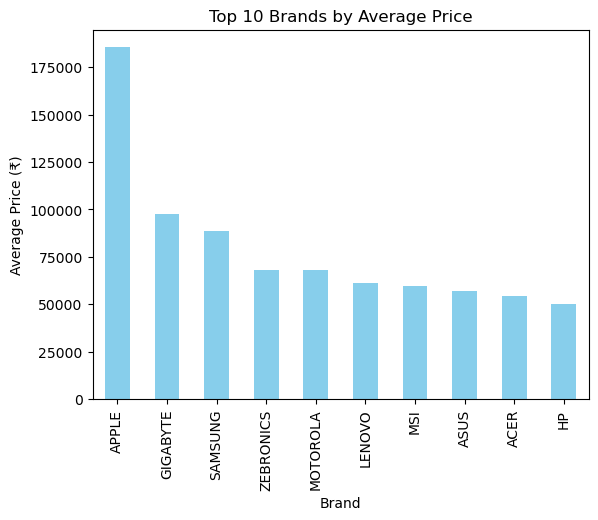

In [103]:
top_brands = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', color='skyblue')
plt.title("Top 10 Brands by Average Price")
plt.ylabel("Average Price (₹)")
plt.show()